In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

In [3]:
payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m"
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}]

In [4]:
req = requests.post(url, json=payload).json()
rows = req[0]['data']['ace_search_product_v4']['data']['products']
print(len(rows))

60


In [5]:
print(req)

[{'data': {'ace_search_product_v4': {'header': {'totalData': 13808708, 'totalDataText': '13.5jt+', 'processTime': 0.281139519, 'responseCode': 6, 'errorMessage': '', 'additionalParams': 'rf=true&nuq=ac', 'keywordProcess': '7', 'componentId': '02.01.00.00', '__typename': 'AceSearchUnifyHeader'}, 'data': {'banner': {'position': 0, 'text': '', 'imageUrl': '', 'url': '', 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyBanner'}, 'backendFilters': '', 'isQuerySafe': True, 'ticker': {'text': '', 'query': '', 'typeId': 0, 'componentId': '', 'trackingOption': 0, '__typename': 'AceSearchUnifyTicker'}, 'redirection': {'redirectUrl': '', 'departmentId': 0, '__typename': 'AceSearchUnifyRedirection'}, 'related': {'position': 0, 'trackingOption': 0, 'relatedKeyword': 'ac', 'otherRelated': [], '__typename': 'AceSearchUnifyRelated'}, 'suggestion': {'currentKeyword': '{}', 'suggestion': 'ac', 'suggestionCount': 13832333, 'instead': '', 'insteadCount': 0, 'query': '', 'text': 'Tidak 

In [6]:
for i in range(0, len(rows)):
    no = i
    nama_produk = rows[i]['name']
    harga = rows[i]['price']
    rating = rows[i]['ratingAverage']
    toko = rows[i]['shop']['name']
    lokasi = rows[i]['shop']['city']
    tjl = rows[i]['labelGroups']
    terjual = ''
    for i in tjl:
        if tjl[0]['position'] == 'costperunit':
            terjual = ''
        elif tjl[0]['title'] == 'PreOrder':
            terjual = ''
        elif tjl[0]['title'] == 'Grosir':
            terjual = ''
        elif tjl[0]['title'] == 'Produk Terbaru':
            terjual = ''
        elif tjl[0]['title'] =='Cashback':
            terjual = ''
        else:
            terjual = tjl[0]['title']
    #terjual = next((rows[i]['labelGroups'][0]['title'] for item in rows[i]['labelGroups'][0] if rows[i]['labelGroups'][0]['position'] == 'integrity'), None)
    print(no, nama_produk, harga, rating, toko, lokasi, terjual)

0 GREE GWC-09MOO5-S AC 1PK Split Standart Auto Clean 1 PK GWC09MOO5S Rp3.619.000 5.0 Permata Elektronik Jakarta Pusat Cashback 3%
1 AC SHARP AH-A 09 SAY 1 PK + PASANG R32 STANDARD THAILAND 09SAY Rp3.099.000 4.8 Starlyn Elektronik Jakarta Barat Cashback 3%
2 AC Daikin Standard Thailand 2 PK Type FTC50NV14 Rp7.299.000 5.0 PT SSM Jakarta Selatan Sisa 8
3 New !! GREE AC Split 1/2 PK GWC-05MOO5-S AC Split 0.5 PK GWC-05MOO5S Rp3.039.000 4.9 Sajun Electronic Jakarta Utara Cashback 3%
4 Gree AC Standard 1/2 pk GWC-05MOO5 Unit Only - 05 MOO5 GARANSI RESMI Rp3.039.000 5.0 89 elektronik Jakarta Barat Cashback 3%
5 PANASONIC YN09WKJ AC SPLIT 1PK STANDARD R32 Unit Only YN09 WKJ Rp3.594.333 4.9 Delta Electronics Tangerang Sisa 3
6 Plastik Cuci AC Besar 1/2 - 2 PK Rp32.000 4.9 Pacific Plastik Inti - JKT Jakarta Barat Terlaris
7 GREE GWC-18MOO5-S AC 2PK Split Standart Auto Clean 2 PK GWC18MOO5S Rp6.439.000 5.0 Permata Elektronik Jakarta Pusat Cashback 3%
8 Bracket AC Outdoor KEIKIN Bracket 0,5pk-1pk F

In [7]:
len(terjual)

6

In [8]:
search = 'mancozeb'
url = 'https://gql.tokopedia.com/graphql/SearchProductQueryV4'

def get_param():
    params = []
    for i in range(1,27):
        param = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(i, search, (i-1)*60)
        params.append(param)

    return params

def scraped(param):
    payload = [{
    'operationName': "SearchProductQueryV4",
    'variables': {
        "params": param
        },
    'query': "query SearchProductQueryV4($params: String!) {\n  ace_search_product_v4(params: $params) {\n    header {\n      totalData\n      totalDataText\n      processTime\n      responseCode\n      errorMessage\n      additionalParams\n      keywordProcess\n      componentId\n      __typename\n    }\n    data {\n      banner {\n        position\n        text\n        imageUrl\n        url\n        componentId\n        trackingOption\n        __typename\n      }\n      backendFilters\n      isQuerySafe\n      ticker {\n        text\n        query\n        typeId\n        componentId\n        trackingOption\n        __typename\n      }\n      redirection {\n        redirectUrl\n        departmentId\n        __typename\n      }\n      related {\n        position\n        trackingOption\n        relatedKeyword\n        otherRelated {\n          keyword\n          url\n          product {\n            id\n            name\n            price\n            imageUrl\n            rating\n            countReview\n            url\n            priceStr\n            wishlist\n            shop {\n              city\n              isOfficial\n              isPowerBadge\n              __typename\n            }\n            ads {\n              adsId: id\n              productClickUrl\n              productWishlistUrl\n              shopClickUrl\n              productViewUrl\n              __typename\n            }\n            badges {\n              title\n              imageUrl\n              show\n              __typename\n            }\n            ratingAverage\n            labelGroups {\n              position\n              type\n              title\n              url\n              __typename\n            }\n            componentId\n            __typename\n          }\n          componentId\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        suggestionCount\n        instead\n        insteadCount\n        query\n        text\n        componentId\n        trackingOption\n        __typename\n      }\n      products {\n        id\n        name\n        ads {\n          adsId: id\n          productClickUrl\n          productWishlistUrl\n          productViewUrl\n          __typename\n        }\n        badges {\n          title\n          imageUrl\n          show\n          __typename\n        }\n        category: departmentId\n        categoryBreadcrumb\n        categoryId\n        categoryName\n        countReview\n        customVideoURL\n        discountPercentage\n        gaKey\n        imageUrl\n        labelGroups {\n          position\n          title\n          type\n          url\n          __typename\n        }\n        originalPrice\n        price\n        priceRange\n        rating\n        ratingAverage\n        shop {\n          shopId: id\n          name\n          url\n          city\n          isOfficial\n          isPowerBadge\n          __typename\n        }\n        url\n        wishlist\n        sourceEngine: source_engine\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
    }]

    req = requests.post(url, json=payload).json()
    rows = req[0]['data']['ace_search_product_v4']['data']['products']
    #print(len(rows))
    scraped = []
    for i in range(0, len(rows)):
        no = i
        toko = rows[i]['shop']['name']
        lokasi = rows[i]['shop']['city']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']
        rating = rows[i]['ratingAverage']
        tjl = rows[i]['labelGroups']
        terjual = ''
        for i in tjl:
            if tjl[0]['position'] == 'costperunit':
                terjual = ''
            elif tjl[0]['title'] == 'PreOrder':
                terjual = ''
            elif tjl[0]['title'] == 'Grosir':
                terjual = ''
            elif tjl[0]['title'] == 'Produk Terbaru':
                terjual = ''
            elif tjl[0]['title'] =='Cashback':
                terjual = ''
            else:
                terjual = tjl[0]['title']
        scraped.append((
            nama_produk, harga, rating, toko, lokasi, terjual
        ))
    return scraped

if __name__ == '__main__':
    params = get_param()
    all_data = []
    for i in range(0, len(params)):
        param = params[i]
        data = scraped(param)
        all_data.extend(data)
    #print(all_data)
    df_mancozeb = pd.DataFrame(all_data, columns=['Nama Produk', 'Harga', 'Rating', 'Toko', 'Lokasi', 'Terjual'])

In [ ]:
#params_all = "device=desktop&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&scheme=https&shipping=&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=f08be1bade37d8b418e36e1022cb819c&user_addressId=&user_cityId=176&user_districtId=2274&user_id=&user_lat=&user_long=&user_postCode=&user_warehouseId=12210375&variants=&warehouses=12210375%232h%2C0%2315m".format(page, start)

In [9]:
df_mancozeb

,Nama Produk,Harga,Rating,Toko,Lokasi,Terjual
0,Fungisida BAROZEB 85WP Mancozeb Biru + Silika 1kg,Rp69.000,4.9,Tani Prima,Kab. Wonosobo,Cashback 1%
1,Fungisida yoozeb 82wp blue 1 kg fungisida manc...,Rp88.000,5.0,PRIMA TANI SITUBONDO,Kab. Situbondo,
2,Fungisida Mantra Mancozeb Cair pengendali jamu...,Rp38.000,5.0,Agro Mandiri Group 41,Kab. Kediri,
3,FUNGISIDA BAROZEB MANCOZEB BIRU + SILIKA 85 WP...,Rp68.000,4.8,TRUBUS TANI ONLINE,Kab. Wonosobo,Terjual 250+
4,Fungisida Mancozeb Triple Blue 80WP 1kg,Rp75.000,5.0,Agro Mandiri Group 41,Kab. Kediri,Terjual 5
...,...,...,...,...,...,...
1555,Fungisida Barozeb 85 Wp. Mancozeb Biru Dimetom...,Rp118.000,,queena28,Jakarta Utara,
1556,FUNGISIDA NUTRIZEB 87WP 1KG | MANCOZEB 87% NUT...,Rp210.000,,Mentari mesha,Kab. Bekasi,
1557,"Fungisida YOOZEB 82WP 1kg, mankozeb biru, manc...",Rp157.000,,DARANAFISA,Kab. Sragen,
1558,FUNGISIDA SISTEMIK PROTECT 85 WP 3 Bahan Aktif...,Rp155.000,,modrastore,Bandung,


In [10]:
df_mancozeb['Terjual'].unique()

array(['Cashback 1%', '', 'Terjual 250+', 'Terjual 5', 'Terjual 50+',
       'Terjual 19', 'Terjual 17', 'Terjual 2', 'Terjual 12',
       'Terjual 30+', 'Terjual 9', 'Terjual 1', 'Terjual 3',
       'Diskon 5 rb', 'Terjual 6', 'Cashback 5 rb', 'Cashback 10 rb',
       'Terjual 10', 'Diskon 10 rb', 'Cashback 5%', 'Cashback 20 rb',
       'Cashback 10%', 'Diskon 20 rb', 'Terjual 18', 'Cashback 2%'],
      dtype=object)

In [11]:
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 1', 'Terjual_num1'] = '1'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 2', 'Terjual_num1'] = '2'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 3', 'Terjual_num1'] = '3'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 4', 'Terjual_num1'] = '4'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 5', 'Terjual_num1'] = '5'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 6', 'Terjual_num1'] = '6'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 7', 'Terjual_num1'] = '7'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 8', 'Terjual_num1'] = '8'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 9', 'Terjual_num1'] = '9'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 10', 'Terjual_num1'] = '10'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 11', 'Terjual_num1'] = '11'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 12', 'Terjual_num1'] = '12'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 13', 'Terjual_num1'] = '13'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 15', 'Terjual_num1'] = '15'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 16', 'Terjual_num1'] = '16'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 18', 'Terjual_num1'] = '18'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 19', 'Terjual_num1'] = '19'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 20', 'Terjual_num1'] = '20'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 21', 'Terjual_num1'] = '21'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 22', 'Terjual_num1'] = '22'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 24', 'Terjual_num1'] = '24'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 25', 'Terjual_num1'] = '25'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 28', 'Terjual_num1'] = '28'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 30+', 'Terjual_num1'] = '30'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 50+', 'Terjual_num1'] = '50'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 60+', 'Terjual_num1'] = '60'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 80+', 'Terjual_num1'] = '80'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 250+', 'Terjual_num1'] = '250'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 500+', 'Terjual_num1'] = '500'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 750+', 'Terjual_num1'] = '750'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 1 rb+', 'Terjual_num1'] = '1000'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 3 rb+', 'Terjual_num1'] = '3000'
df_mancozeb.loc[df_mancozeb['Terjual'] == 'Terjual 4 rb+', 'Terjual_num1'] = '4000'

In [12]:
df_mancozeb['Terjual_num1'] = df_mancozeb['Terjual_num1'].astype(float)

In [13]:
df_mancozeb['Rating'] = df_mancozeb['Rating'].replace('', np.nan, regex=True)
df_mancozeb['Rating'] = df_mancozeb['Rating'].astype(float)

In [14]:
df_mancozeb['Harga'] = df_mancozeb['Harga'].str.replace(r'\D', '')

C:\Users\i_fes\AppData\Local\Temp\ipykernel_2872\4027234911.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mancozeb['Harga'] = df_mancozeb['Harga'].str.replace(r'\D', '')


In [15]:
df_mancozeb['Harga'] = df_mancozeb['Harga'].astype(float)

In [16]:
df_mancozeb.dtypes

Nama Produk      object
Harga           float64
Rating          float64
Toko             object
Lokasi           object
Terjual          object
Terjual_num1    float64
dtype: object

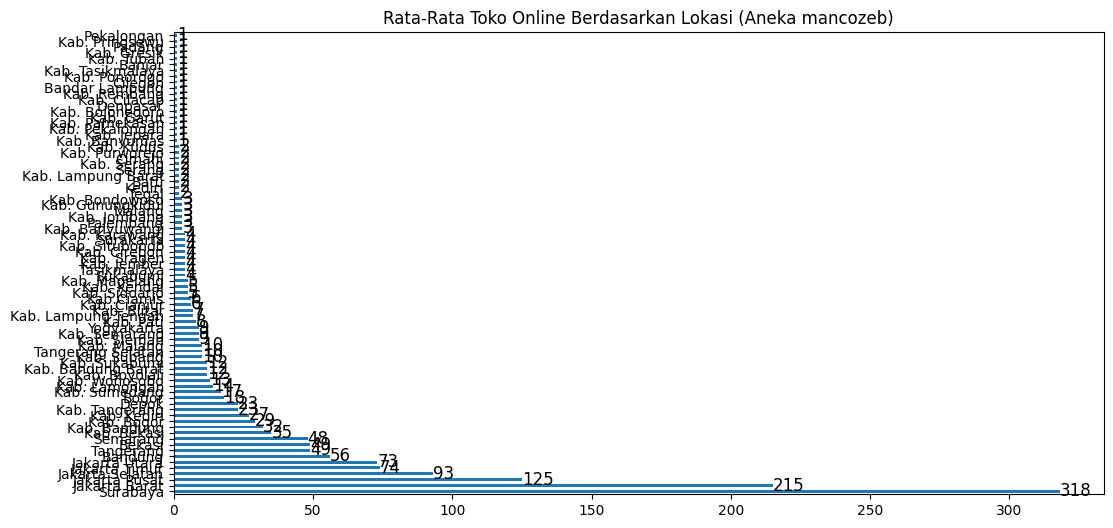

In [17]:
ax = df_mancozeb['Lokasi'].value_counts() \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Toko Online Berdasarkan Lokasi (Aneka mancozeb)')

plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize = 12)

plt.show()

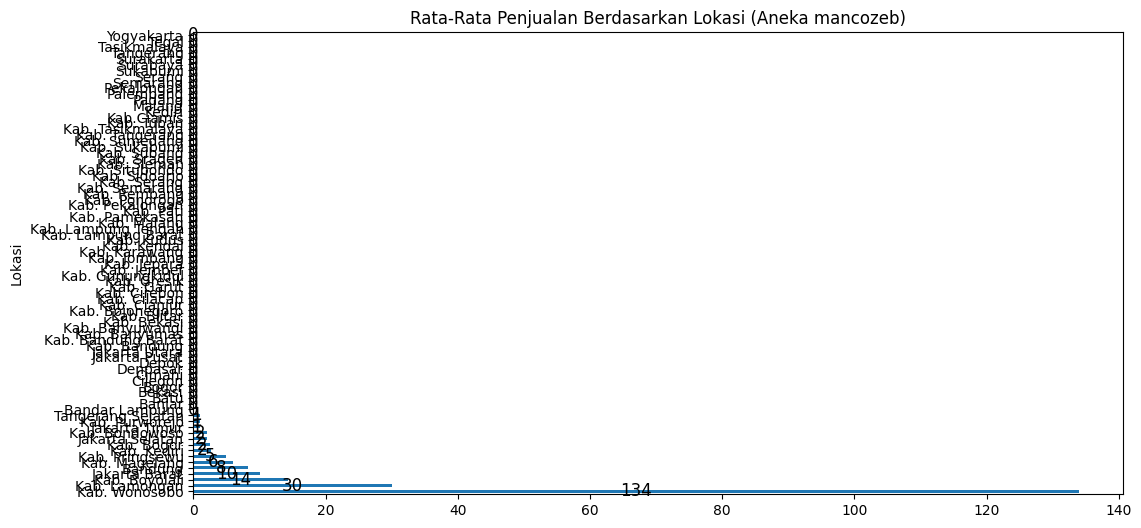

In [18]:
ax = df_mancozeb.groupby('Lokasi')['Terjual_num1'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (12,6), title='Rata-Rata Penjualan Berdasarkan Lokasi (Aneka mancozeb)')
ax.bar_label(ax.containers[0], label_type = 'center', fmt = '%d', fontsize=12)
plt.show()

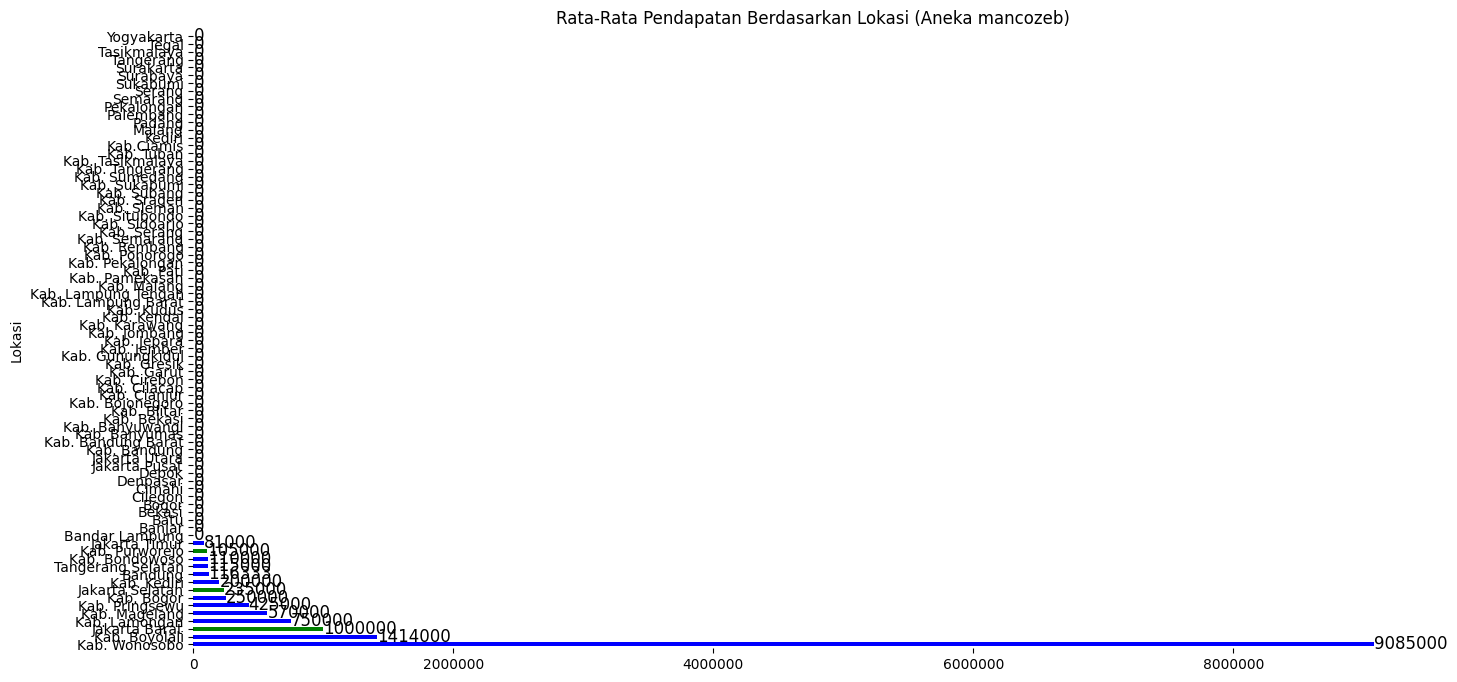

In [19]:
df_mancozeb['Pendapatan'] = df_mancozeb['Terjual_num1']*df_mancozeb['Harga']
my_colors = list('bbgbb')

ax = df_mancozeb.groupby('Lokasi')['Pendapatan'].mean().sort_values(ascending=False) \
    .plot(kind= 'barh', figsize = (16,8), title='Rata-Rata Pendapatan Berdasarkan Lokasi (Aneka mancozeb)', color=my_colors)
plt.ticklabel_format(style='plain', axis='x')

ax.bar_label(ax.containers[0], label_type = 'edge', fmt = '%d', fontsize=12)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

#rects = ax.patches

#labels = [f"label{i}" for i in range(len(rects))]


#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(
#        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#    )

plt.show()

C:\Users\i_fes\AppData\Local\Temp\ipykernel_2872\3443508564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_mancozeb.dropna().corr()


<Axes: >

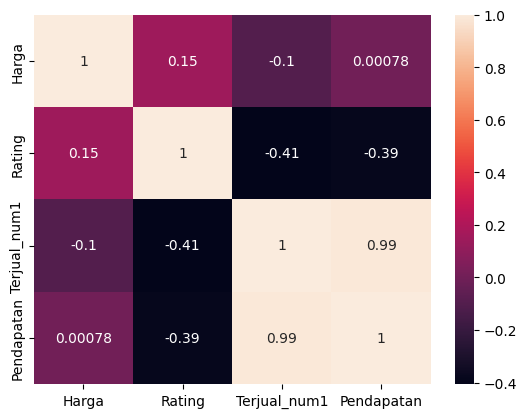

In [20]:
df_corr = df_mancozeb.dropna().corr()
sns.heatmap(df_corr, annot = True)

In [ ]:
#df_mancozeb.to_excel('Tokped_Daging_API.xlsx', index=False)